# 2. Kinematics of Serial Robots: Position Analysis

#### 2.2 Robots as Mechanisms

In [1]:
import numpy as np

# Define vectors for the 4-bar mechanism
O1A = np.array([1, 2])  # Example vector
AB = np.array([2, 1])
O1O2 = np.array([1, 1])
O2B = np.array([2, 2])

# Check the 4-bar mechanism equation: O1A + AB == O1O2 + O2B
left_side_4bar = O1A + AB
right_side_4bar = O1O2 + O2B

print("4-bar mechanism:")
print("Left side:", left_side_4bar)
print("Right side:", right_side_4bar)
print("Equal:", np.allclose(left_side_4bar, right_side_4bar))
print()

# Define vectors for the robot mechanism
O1A_robot = np.array([1, 2])  # Example vector
AB_robot = np.array([2, 1])
BC_robot = np.array([1, 3])
O1C = np.array([4, 6])

# Check the robot mechanism equation: O1A + AB + BC == O1C
left_side_robot = O1A_robot + AB_robot + BC_robot
right_side_robot = O1C

print("Robot mechanism:")
print("Left side:", left_side_robot)
print("Right side:", right_side_robot)
print("Equal:", np.allclose(left_side_robot, right_side_robot))


4-bar mechanism:
Left side: [3 3]
Right side: [3 3]
Equal: True

Robot mechanism:
Left side: [4 6]
Right side: [4 6]
Equal: True


#### 2.4.1 Representation of a Point in Space

In [2]:
import numpy as np

# Define the coefficients for the point P
a = 2  # coefficient for the i (x) component
b = 3  # coefficient for the j (y) component
c = 4  # coefficient for the k (z) component

# Define the unit vectors for the reference frame
i = np.array([1, 0, 0])  # x-axis unit vector
j = np.array([0, 1, 0])  # y-axis unit vector
k = np.array([0, 0, 1])  # z-axis unit vector

# Calculate the point P in space
P = a * i + b * j + c * k

print("Point P in space relative to the reference frame:")
print("P =", P)

# Function to experiment with different coefficients
def experiment_with_point(a, b, c):
    P = a * i + b * j + c * k
    return P

# Experiment with different values
a_new, b_new, c_new = 5, 6, 7
P_new = experiment_with_point(a_new, b_new, c_new)
print("\nPoint P with new coefficients (a_new, b_new, c_new):")
print("P_new =", P_new)

Point P in space relative to the reference frame:
P = [2 3 4]

Point P with new coefficients (a_new, b_new, c_new):
P_new = [5 6 7]


#### 2.4.2 Representation of a Vector in Space

In [3]:
import numpy as np

# Define the coordinates of point A (tail of the vector)
A = np.array([1, 2, 3])  # Ax, Ay, Az

# Define the coordinates of point B (head of the vector)
B = np.array([4, 6, 8])  # Bx, By, Bz

# Calculate the vector PAB from A to B
PAB = B - A

print("Vector PAB from point A to point B:")
print("PAB =", PAB)

# Function to experiment with different points A and B
def experiment_with_vector(A, B):
    PAB = B - A
    return PAB

# Experiment with different points
A_new = np.array([2, 3, 4])
B_new = np.array([5, 7, 9])
PAB_new = experiment_with_vector(A_new, B_new)
print("\nVector PAB with new points A_new and B_new:")
print("A_new =", A_new)
print("B_new =", B_new)
print("PAB_new =", PAB_new)

Vector PAB from point A to point B:
PAB = [3 4 5]

Vector PAB with new points A_new and B_new:
A_new = [2 3 4]
B_new = [5 7 9]
PAB_new = [3 4 5]


In [4]:
import numpy as np

# Original vector components
P = np.array([3, 5, 2])

# 1. Vector with a scale factor of 2
scale_factor = 2
P_scaled = np.append(P * scale_factor, scale_factor)
print("Vector with a scale factor of 2:")
print(P_scaled)

# 2. Vector as a unit vector
magnitude = np.linalg.norm(P)
P_unit = P / magnitude
print("Unit vector:")
print(P_unit)

Vector with a scale factor of 2:
[ 6 10  4  2]
Unit vector:
[0.48666426 0.81110711 0.32444284]


#### 2.4.3 Representation of a Frame at the Origin of a Fixed Reference Frame

In [6]:
import numpy as np

# Define directional cosines relative to the reference frame Fx,y,z
nx, ny, nz = 0.6, 0.8, 0.0   # Directional cosines of x-axis of Fn relative to Fx,y,z
ox, oy, oz = -0.8, 0.6, 0.0  # Directional cosines of y-axis of Fn relative to Fx,y,z
ax, ay, az = 0.0, 0.0, 1.0   # Directional cosines of z-axis of Fn relative to Fx,y,z

# Create the matrix F representing the orientation of frame Fn relative to Fx,y,z
F = np.array([[nx, ox, ax],
[ny, oy, ay],
[nz, oz, az]])

print("Matrix F representing the orientation of frame Fn relative to Fx,y,z:")
print(F)


Matrix F representing the orientation of frame Fn relative to Fx,y,z:
[[ 0.6 -0.8  0. ]
 [ 0.8  0.6  0. ]
 [ 0.   0.   1. ]]


#### 2.4.4 Representation of a Frame Relative to a Fixed Reference Frame

In [7]:
import numpy as np

def create_frame_F_matrix():
    """
    Create a 4x4 homogeneous transformation matrix representing frame F.

    Returns:
    - 4x4 numpy array representing the frame F matrix.
    """
    # Directional unit vectors
    nx = 1.0  # Parallel to x-axis
    ny = np.sqrt(2) / 2  # Rotated 45 degrees relative to y-axis
    nz = np.sqrt(2) / 2  # Rotated 45 degrees relative to z-axis
    
    # Position vector
    px, py, pz = 3.0, 5.0, 7.0  # Location of frame F relative to reference frame
    
    # Initialize the matrix with zeros
    frame_matrix = np.zeros((4, 4))
    
    # Fill in directional unit vectors
    frame_matrix[0, :3] = [nx, 0, 0]
    frame_matrix[1, :3] = [0, ny, nz]
    frame_matrix[2, :3] = [0, -nz, ny]
    
    # Fill in position vector with scaling factor 1
    frame_matrix[:3, 3] = [px, py, pz]
    frame_matrix[3, 3] = 1  # Scaling factor for position
    
    return frame_matrix

# Create the frame F matrix
frame_F_matrix = create_frame_F_matrix()

# Print the frame F matrix
print("Frame F Matrix:")
print(frame_F_matrix)

# Example: Transforming a point using the frame F matrix
point = np.array([1.0, 1.0, 1.0, 1.0])  # Example point [x, y, z, 1]
transformed_point = np.dot(frame_F_matrix, point)
print("\nTransformed Point using Frame F:")
print(transformed_point)


Frame F Matrix:
[[ 1.          0.          0.          3.        ]
 [ 0.          0.70710678  0.70710678  5.        ]
 [ 0.         -0.70710678  0.70710678  7.        ]
 [ 0.          0.          0.          1.        ]]

Transformed Point using Frame F:
[4.         6.41421356 7.         1.        ]


#### 2.5 Homogeneous Transformation Matrices

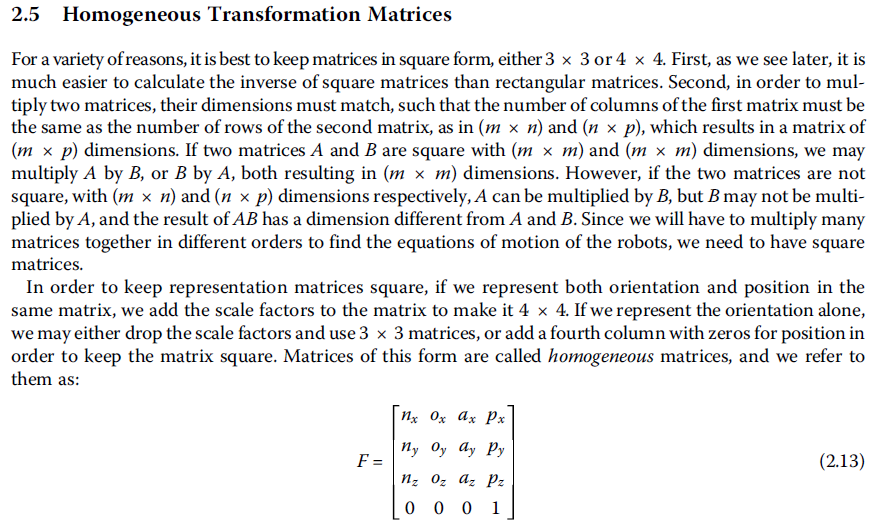

# 2.6 Representation of Transformations

- A transformation is defined as making a movement in space
- When a frame (a vector, object or a moving frame) moves in space relative to a fixed reference frame, we represent this motion in a form similar to a frame representation
- This is because a transformation is a change in the state of frame
- A transformation may be in one of the following forms:
1. A pure translation
2. A pure rotation about an axis
3. A combination of translation and rotation 

#### 2.6.1 Representation of a Pure Translation
- When a point, vector or object moves in space without any rotation
- The direction unit vectors remain unchanged 
- Only the origin of the frame relative to the reference frame changes

In [16]:
F = np.array([
    [0.527,     -0.574, 0.628,  8],
    [0.369,     0.819,  0.439,  10],
    [-0.766,    0,      0.643,  6],
    [0,         0,      0,      1]
])

T = np.array([
    [1,0,0,3],
    [0,1,0,0],
    [0,0,1,2],
    [0,0,0,1]
])

T @ F

array([[ 0.527, -0.574,  0.628, 11.   ],
       [ 0.369,  0.819,  0.439, 10.   ],
       [-0.766,  0.   ,  0.643,  8.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

#### 2.6.2 Representation of a Pure Rotation about an Axis

In [21]:
import numpy as np

def rotation_x(theta):
    C = np.cos(theta)
    S = np.sin(theta)
    R_x = np.array([
        [1,0,0],
        [0,C,-S],
        [0,S,C]
    ])
    return R_x

theta = np.pi / 4

rotation_x(theta)


array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 0.        ,  0.70710678,  0.70710678]])

#### Example 2.7

In [24]:
Sym_x = np.array([
    [1,0,0],
    [0, np.cos(np.pi / 2), -np.sin(np.pi / 2)],
    [0, np.sin(np.pi / 2), np.cos(np.pi / 2)]
])

R_x = np.array([
    [1,0,0],
    [0,0,-1],
    [0,1,0]
])

F = np.array([
    [2],
    [3],
    [4]
])

Sym_x @ F

array([[ 2.],
       [-4.],
       [ 3.]])

#### 2.6.3 Representation of Combined Transformations
- Remember that the matrix is pre-multiplied

#### Example 2.8

In [45]:
def Trans(x,y,z):
    return np.array([
        [x],
        [y],
        [z],
        [1]
    ])

def R_x(theta):
    return np.array([
        [1,     0,              0],
        [0,     np.cos(theta),  -np.sin(theta)],
        [0,     np.sin(theta),  np.cos(theta)]
    ])
def R_y(theta):
    return np.array([
        [np.cos(theta),     0,  np.sin(theta)],
        [0,                 1,  0],
        [-np.sin(theta),    0, np.cos(theta)]
    ])
def R_z(theta):
    return np.array([
        [np.cos(theta),     -np.sin(theta),     0],
        [np.sin(theta),     np.cos(theta),      0],
        [0,                 0,                  1]
    ])

P = np.array([
    [7],
    [3],
    [1]
])

R_y(np.pi/2) @ R_z(np.pi/2) @ P



array([[1.],
       [7.],
       [3.]])

In [51]:
import numpy as np

# Define the matrices
Trans = np.array([
    [1, 0, 0, 4],
    [0, 1, 0, -3],
    [0, 0, 1, 7],
    [0, 0, 0, 1]
])

Y_90 = np.array([
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 1]
])

Z_90 = np.array([
    [0, -1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Define the point
P = np.array([7, 3, 1, 1])

# Perform the matrix multiplications
print(f"{Trans @ Y_90 @ Z_90 @ P}")
print(f"{Y_90 @ Trans @ Z_90 @ P}")




[ 5  4 10  1]
[ 8  4 -1  1]


#### 2.6.4 Transformations Relative to the Current (Moving) Frame
- The transformation matrix is post-multiplied instead, when calculating coordinates from the moving / current frame
- See the different in relative perspective

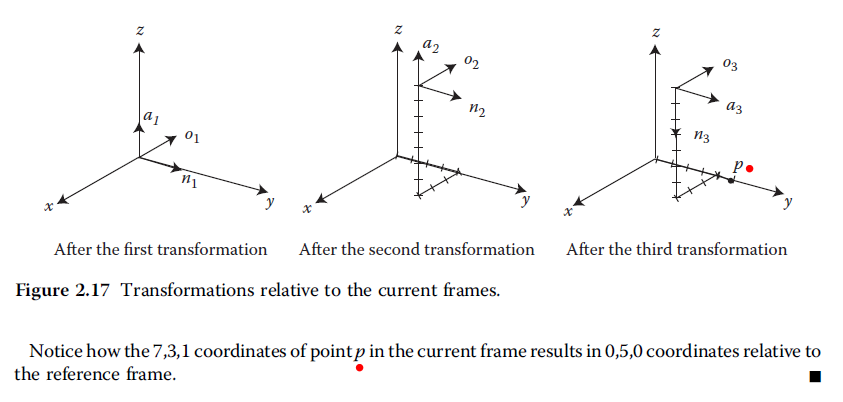



#### 2.6.5 Mixed Transformation Relative to Rotating and Reference Frames
#### Example 2.12
- You can see the pre- and post-multiplications around the [F old] frame.

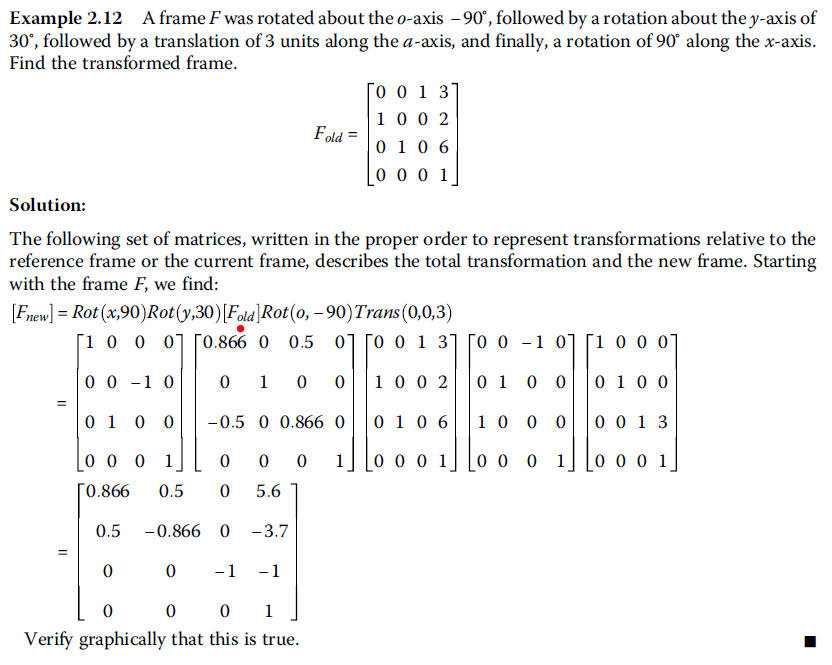

### 2.7 Inverse of Transformation Matrices

In [59]:
import numpy as np

def R_x(theta):
    return np.array([
        [1,     0,              0],
        [0,     np.cos(theta),  -np.sin(theta)],
        [0,     np.sin(theta),  np.cos(theta)]
    ])
    
r_X = R_x(np.pi/2)    

display(r_X)

display(r_X.T)

np.linalg.inv(r_X)



array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17, -1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  6.123234e-17]])

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17,  1.000000e+00],
       [ 0.000000e+00, -1.000000e+00,  6.123234e-17]])

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  6.123234e-17,  1.000000e+00],
       [-0.000000e+00, -1.000000e+00,  6.123234e-17]])

#### Example 2.13

In [70]:
import math

def R_x(theta):
    return np.array([
        [1,     0,              0,              0],
        [0,     np.cos(theta),  -np.sin(theta), 0],
        [0,     np.sin(theta),  np.cos(theta),  0],
        [0,      0,              0,              1]
    ])


display(math.radians(45))
display(45 * math.pi / 180)

Rx = R_x(math.radians(40))
Rx.T




0.7853981633974483

0.7853981633974483

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.76604444,  0.64278761,  0.        ],
       [ 0.        , -0.64278761,  0.76604444,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

#### Example 2.14

In [74]:
import numpy as np

T = np.array([
        [0.5,   0,  0.866,  3],
        [0.866, 0,  -0.5,   2],
        [0,     1,  0,      5],
        [0,     0,  0,      1]
])

print(f"The Transpose:\n {T.T}")

print(f"The Inverse:\n {np.linalg.inv(T)}")

The Transpose:
 [[ 0.5    0.866  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.866 -0.5    0.     0.   ]
 [ 3.     2.     5.     1.   ]]
The Inverse:
 [[ 0.500022    0.86603811  0.         -3.23214221]
 [ 0.          0.          1.         -5.        ]
 [ 0.86603811 -0.500022    0.         -1.59807032]
 [ 0.          0.          0.          1.        ]]


#### Example 2.15

In [84]:
import numpy as np

# Define the matrices as NumPy arrays
T5_H = np.array([
    [0, -1, 0, 0],
    [1,  0, 0, 0],
    [0,  0, 1, 4],
    [0,  0, 0, 1]
])

TH_E = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 3],
    [0, 0, 0, 1]
])

T5_cam = np.array([
    [0,  0, -1, 3],
    [0, -1,  0, 0],
    [-1, 0,  0, 5],
    [0,  0,  0, 1]
])

Tcam_obj = np.array([
    [0, 0, 1, 2],
    [1, 0, 0, 2],
    [0, 1, 0, 4],
    [0, 0, 0, 1]
])
np.linalg.inv(TH_E) @ np.linalg.inv(T5_H) @T5_cam @ Tcam_obj

array([[-1.,  0.,  0., -2.],
       [ 0.,  1.,  0.,  1.],
       [ 0.,  0., -1., -4.],
       [ 0.,  0.,  0.,  1.]])

#### 2.16 Example

### 2.8 Forwards and Inverse Kinematics of Robots

### 2.9 Forward and Inverse Kinematic Equations: Position


- The position of an origin of a frame, attached to a rigid body has 3 DOF.
- It can be completely defined by three pieces of information in any of these coordinate systems
  1. Cartesian - three linear motions
  2. Cylindrical - two linear motions and one rotation
  3. Spherical - two rotations and one linear motion
  4. Articulated - three rotations

### 2.9.1 Cartesian (Gantry, Rectangular) coordinates 